# Comparison _ MonteCarlo Study Results
## anealing epsilon greedy vs annealing softmax vs UCB1

조절해야 하는 hyperparameter 없어도 되도록 어닐링 annealing version으로 비교

- UCB1이 annealing Epsilon Greedy, annealing Softmax 보다 noise 훨씬 많음
- UCB1은 softmax 알고리즘 만큼 빨리 conver하지 않음
- 하지만 UCB1이 softmax 따라잡기 까지 시간이 걸리기는 하지만, simulation 거의 끝 부분에서는 따라잡는 것을 볼 수 있음
- UCB1이 bestarm 되게 빠르게 발견하지만 backpedaling 하는 것 때문에 softmax보다 underperfom함 (특히 초반에 )
- softmax 알고리즘은 입실론 그리디 알고리즘 보다는 simply superior!


In [1]:
library("plyr")
library("ggplot2")

annealing.results <- read.csv("../input/bandit-algorithm/D__coding_andit_lgorithms_epsilon_greedy_nnealing_results.tsv", sep="\t", header = FALSE)
names(annealing.results) <- c("Sim", "T", "ChosenArm", "Reward", "CumulativeReward")
annealing.results <- transform(annealing.results, Algorithm = "Annealing epsilon-Greedy")

ucb1.results <- read.csv("../input/bandit-algorithm2/D__coding_andit_lgorithms_ist_ucb_ist_ucb1_results.tsv",sep="\t", header = FALSE)
names(ucb1.results) <- c("Sim", "T", "ChosenArm", "Reward", "CumulativeReward")
ucb1.results <- transform(ucb1.results, Algorithm = "UCB1")

annealing.softmax.results <- read.csv("../input/bandit-algorithm/D__coding_andit_lgorithms_softmax_nnealing_softmax_results (2).tsv", sep="\t", header = FALSE)
names(annealing.softmax.results) <- c("Sim", "T", "ChosenArm", "Reward", "CumulativeReward")
annealing.softmax.results <- transform(annealing.softmax.results, Algorithm = "Annealing Softmax")

results <- rbind(annealing.results, ucb1.results, annealing.softmax.results)



## Compare the average reward at Each point in Time

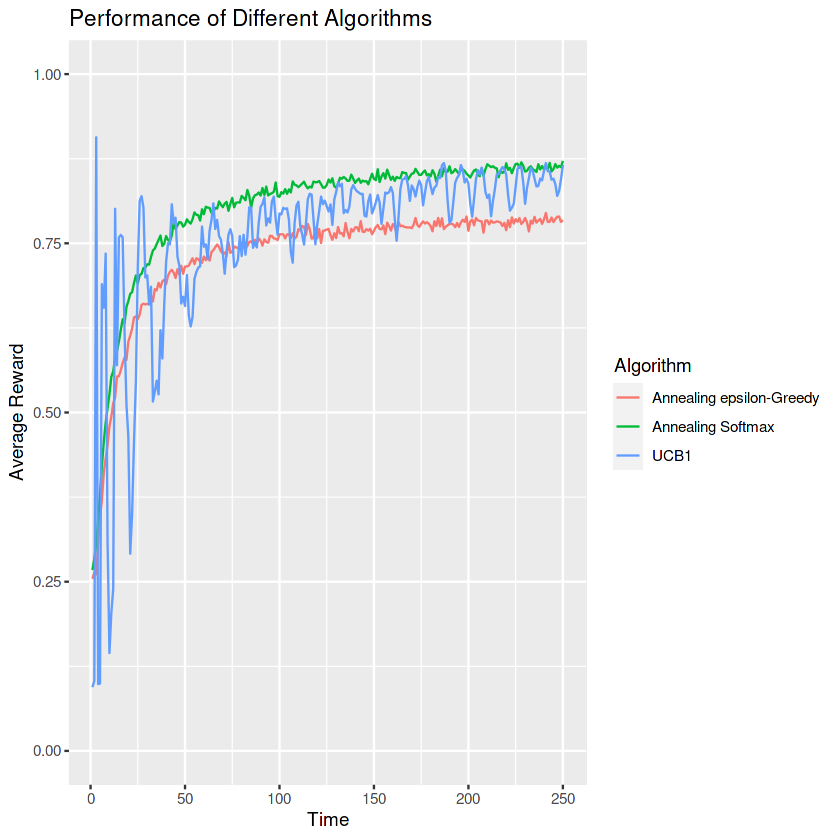

In [2]:
# Plot average reward as a function of time.
stats <- ddply(results,
               c("Algorithm", "T"),
               function (df) {mean(df$Reward)})
ggplot(stats, aes(x = T, y = V1, group = Algorithm, color = Algorithm)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Average Reward") +
  ggtitle("Performance of Different Algorithms")
#ggsave("r/graphs/simple_comparisons_average_reward.pdf")



## Compare the frequency of selecting correct arm as a function of time.

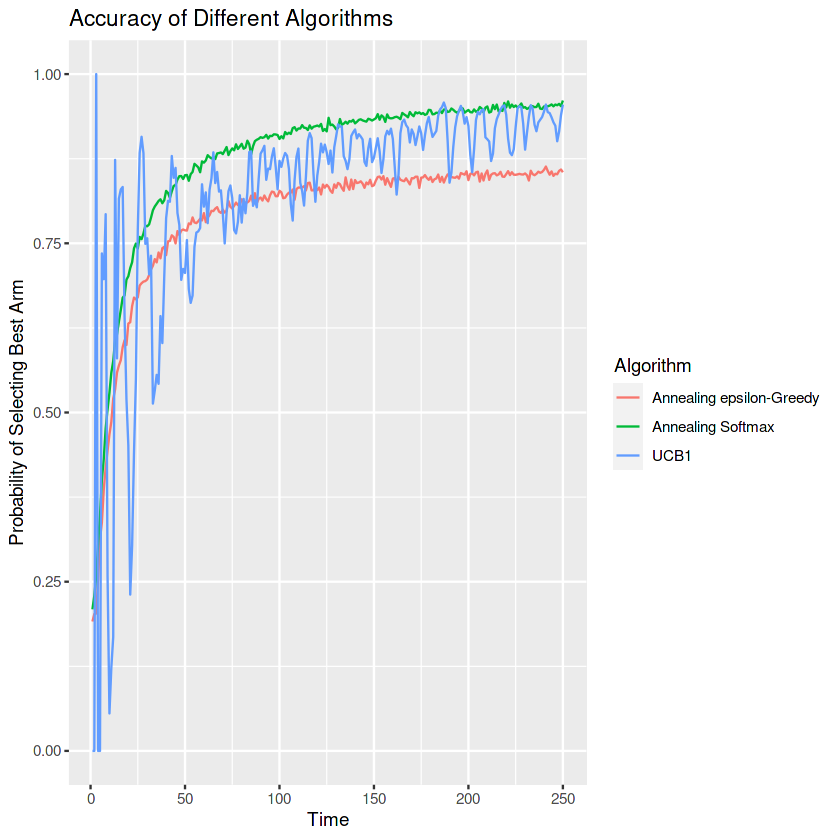

In [3]:
# Plot frequency of selecting correct arm as a function of time.
# In this instance, 5 is the correct arm.
stats <- ddply(results,
               c("Algorithm", "T"),
               function (df) {mean(df$ChosenArm == 2)})
ggplot(stats, aes(x = T, y = V1, group = Algorithm, color = Algorithm)) +
  geom_line() +
  ylim(0, 1) +
  xlab("Time") +
  ylab("Probability of Selecting Best Arm") +
  ggtitle("Accuracy of Different Algorithms")
#ggsave("r/graphs/simple_comparisons_average_accuracy.pdf")



## Compare  variance of chosen arms as a function of time.

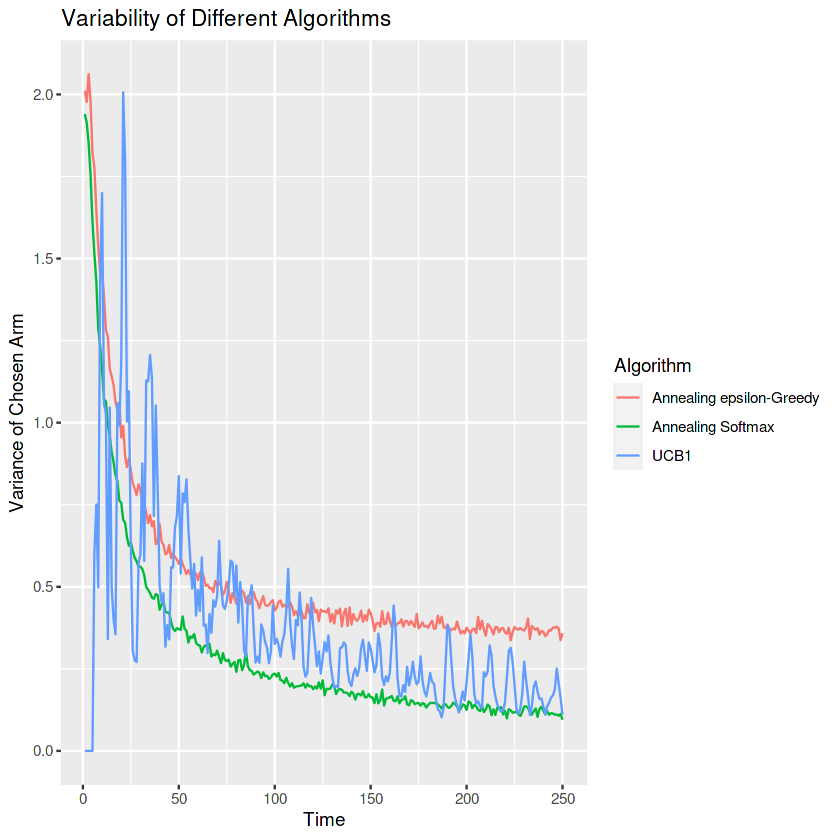

In [4]:
# Plot variance of chosen arms as a function of time.
stats <- ddply(results,
               c("Algorithm", "T"),
               function (df) {var(df$ChosenArm)})
ggplot(stats, aes(x = T, y = V1, group = Algorithm, color = Algorithm)) +
  geom_line() +
  xlab("Time") +
  ylab("Variance of Chosen Arm") +
  ggtitle("Variability of Different Algorithms")
#ggsave("r/graphs/simple_comparisons_variance_choices.pdf")



## Comapre the cumulative reward as a function of time.

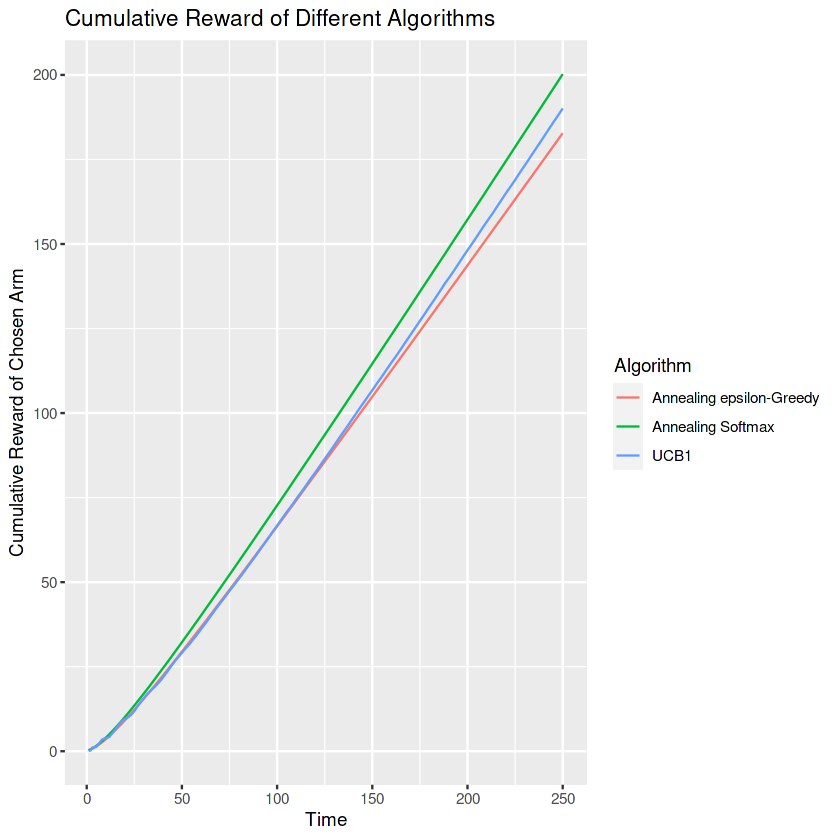

In [5]:
# Plot cumulative reward as a function of time.
stats <- ddply(results,
               c("Algorithm", "T"),
               function (df) {mean(df$CumulativeReward)})
ggplot(stats, aes(x = T, y = V1, group = Algorithm, color = Algorithm)) +
  geom_line() +
  xlab("Time") +
  ylab("Cumulative Reward of Chosen Arm") +
  ggtitle("Cumulative Reward of Different Algorithms")
#ggsave("r/graphs/simple_comparisons_cumulative_reward.pdf")